In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

def load_data(filepath):
    """Load and preprocess the data."""
    data = pd.read_csv(filepath)
    data['id'] = range(1, len(data) + 1)
    return data

def fit_predict_model(time_series, values, interval):
    """Fit a linear regression model and predict future values."""
    model = LinearRegression()
    model.fit(time_series, values)
    next_time_steps = np.arange(time_series[-1] + 1, time_series[-1] + interval + 1).reshape(-1, 1)
    predicted_values = model.predict(next_time_steps)
    return next_time_steps, predicted_values

def plot_series(time_series, original_values, predicted_values, series_label, color, linestyle='solid'):
    """Plot both the original and predicted series."""
    plt.plot(time_series, original_values, label=f'{series_label} series', color=color)
    plt.plot(predicted_values[0], predicted_values[1], label=f'Predicted {series_label} series', linestyle=linestyle, color=color)

def main(filepath, interval):
    data = load_data(filepath)

    # Print column names to verify them
    print("Column names in the dataset:", data.columns)

    # Check if expected columns are present
    expected_columns = {'x', 'y', 'z'}
    if not expected_columns.issubset(data.columns):
        raise ValueError(f"Missing columns in the dataset. Expected columns: {expected_columns}")

    time_series = data['id'].values.reshape(-1, 1)
    series = {'x': 'blue', 'y': 'green', 'z': 'red'}

    plt.figure(figsize=(10, 6))

    for key, color in series.items():
        original_values = data[key].values
        next_time_steps, predicted_values = fit_predict_model(time_series, original_values, interval)
        plot_series(time_series, original_values, (next_time_steps, predicted_values), key, color)
        if key == 'x':
            plot_series(time_series, original_values, (next_time_steps, predicted_values), key, 'cyan', 'dashed')
        elif key == 'y':
            plot_series(time_series, original_values, (next_time_steps, predicted_values), key, 'lime', 'dashed')
        else:
            plot_series(time_series, original_values, (next_time_steps, predicted_values), key, 'salmon', 'dashed')

    plt.xlabel('Time')
    plt.ylabel('Values')
    plt.title('Predicted Values for X, Y, Z Series')
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    filepath = "/content/sensor_database-SensorData.csv"
    interval = int(input("Enter the interval: "))
    try:
        main(filepath, interval)
    except ValueError as e:
        print(e)


Enter the interval: 10
Column names in the dataset: Index(['id;x;y;z', 'id'], dtype='object')
Missing columns in the dataset. Expected columns: {'z', 'y', 'x'}


Data loaded successfully.


<ipython-input-4-07f36a5cb6dc>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_time_steps = np.arange(time_series[-1] + 1, time_series[-1] + interval + 1).reshape(-1, 1)


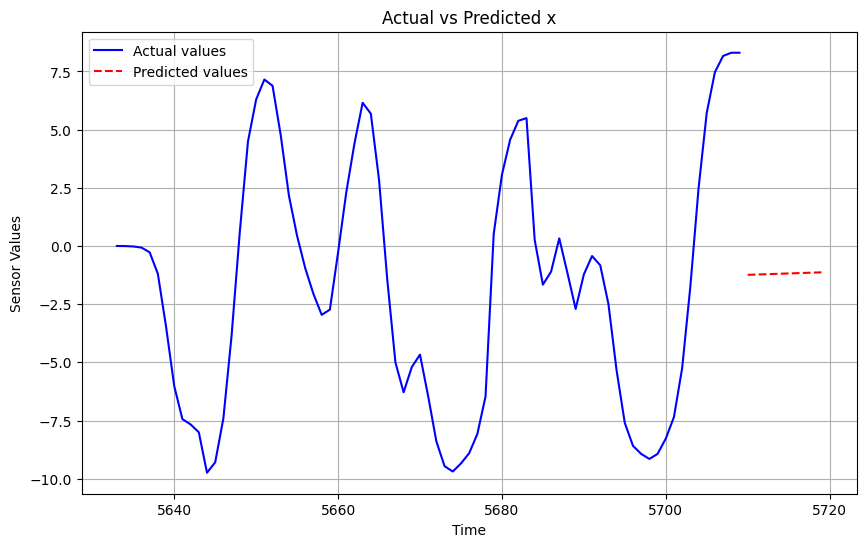

<ipython-input-4-07f36a5cb6dc>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_time_steps = np.arange(time_series[-1] + 1, time_series[-1] + interval + 1).reshape(-1, 1)


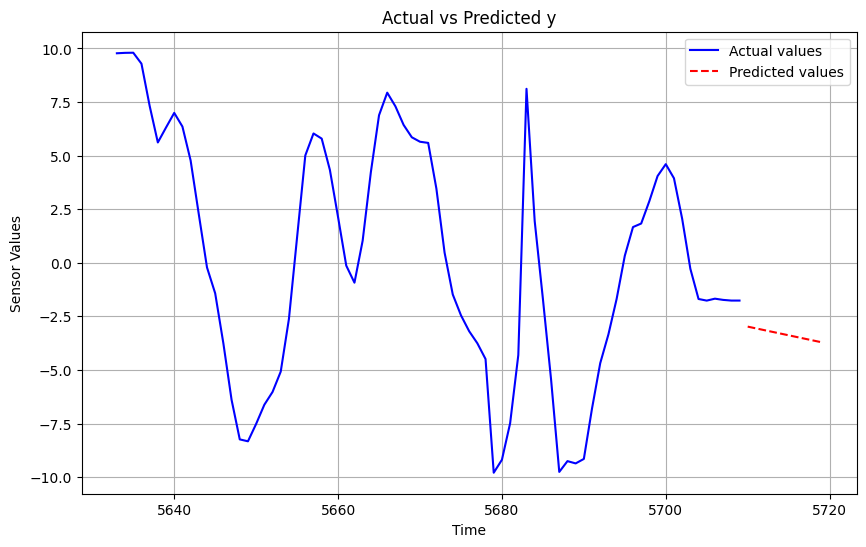

<ipython-input-4-07f36a5cb6dc>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_time_steps = np.arange(time_series[-1] + 1, time_series[-1] + interval + 1).reshape(-1, 1)


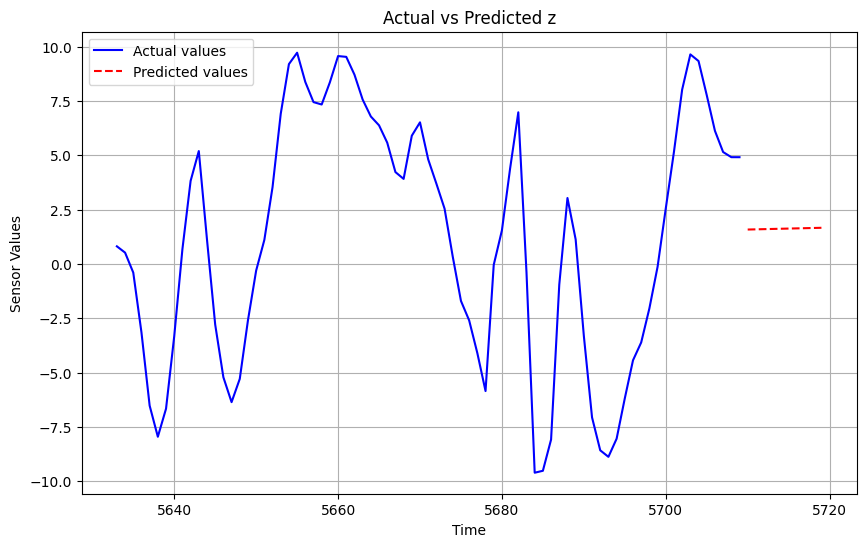

In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

def load_data(filepath):
    """Load the dataset from a CSV file using a semicolon as the delimiter."""
    try:
        data = pd.read_csv(filepath, delimiter=';')
        print("Data loaded successfully.")
        return data
    except Exception as e:
        print("Error loading data:", e)
        return None

def fit_predict_model(time_series, values, interval):
    """Fit a linear regression model to the data and predict future values."""
    model = LinearRegression()
    model.fit(time_series, values)
    next_time_steps = np.arange(time_series[-1] + 1, time_series[-1] + interval + 1).reshape(-1, 1)
    predicted_values = model.predict(next_time_steps)
    return next_time_steps, predicted_values

def plot_series(time_series, values, predicted_values, title):
    """Plot actual and predicted values."""
    plt.figure(figsize=(10, 6))
    plt.plot(time_series, values, label='Actual values', color='blue')
    plt.plot(predicted_values[0], predicted_values[1], label='Predicted values', linestyle='--', color='red')
    plt.xlabel('Time')
    plt.ylabel('Sensor Values')
    plt.title(f'Actual vs Predicted {title}')
    plt.legend()
    plt.grid(True)
    plt.show()

def main(filepath, interval):
    data = load_data(filepath)
    if data is not None:
        time_series = data['id'].values.reshape(-1, 1)
        for column in ['x', 'y', 'z']:
            values = data[column].values
            next_time_steps, predicted_values = fit_predict_model(time_series, values, interval)
            plot_series(time_series, values, (next_time_steps, predicted_values), column)

if __name__ == "__main__":
    filepath = "/content/sensor_database-SensorData.csv"  # Update this path
    interval = 10  # Define the number of future intervals you want to predict
    main(filepath, interval)

